In [59]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [42]:
df = pd.read_csv("/content/vgsales.csv", index_col=0, encoding='unicode_escape')
data=df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12819 entries, 1 to 12820
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          12819 non-null  object 
 1   Platform      12819 non-null  object 
 2   Year          12616 non-null  float64
 3   Genre         12819 non-null  object 
 4   Publisher     12783 non-null  object 
 5   NA_Sales      12818 non-null  float64
 6   EU_Sales      12818 non-null  float64
 7   JP_Sales      12818 non-null  float64
 8   Other_Sales   12818 non-null  float64
 9   Global_Sales  12818 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.1+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
df.isnull().sum()

Name              0
Platform          0
Year            203
Genre             0
Publisher        36
NA_Sales          1
EU_Sales          1
JP_Sales          1
Other_Sales       1
Global_Sales      1
dtype: int64

In [44]:
# percent of missing "Year"
print('Percent of missing "Year" records is %.2f%%' %((df['Year'].isnull().sum()/df.shape[0])*100))
# percent of missing "Publisher"
print('Percent of missing "Publisher" records is %.2f%%' %((df['Publisher'].isnull().sum()/df.shape[0])*100))
# percent of missing "NA_Sales"
print('Percent of missing "NA_Sales" records is %.2f%%' %((df['NA_Sales'].isnull().sum()/df.shape[0])*100))
# percent of missing "EU_Sales"
print('Percent of missing "EU_Sales" records is %.2f%%' %((df['EU_Sales'].isnull().sum()/df.shape[0])*100))
# percent of missing "JP_Sales"
print('Percent of missing "JP_Sales" records is %.2f%%' %((df['JP_Sales'].isnull().sum()/df.shape[0])*100))
# percent of missing "Other_Sales"
print('Percent of missing "Other_Sales" records is %.2f%%' %((df['Other_Sales'].isnull().sum()/df.shape[0])*100))
# percent of missing "Global_Sales"
print('Percent of missing "Global_Sales" records is %.2f%%' %((df['Global_Sales'].isnull().sum()/df.shape[0])*100))

Percent of missing "Year" records is 1.58%
Percent of missing "Publisher" records is 0.28%
Percent of missing "NA_Sales" records is 0.01%
Percent of missing "EU_Sales" records is 0.01%
Percent of missing "JP_Sales" records is 0.01%
Percent of missing "Other_Sales" records is 0.01%
Percent of missing "Global_Sales" records is 0.01%


In [45]:
train_data =df.copy()
print('The most common boarding port of Publisher  is %s.' %df['Publisher'].value_counts().idxmax())
train_data["Publisher"].fillna(df['Publisher'].value_counts().idxmax(), inplace=True)


The most common boarding port of Publisher  is Electronic Arts.


In [46]:
print('The median of "NA_Sales" is %.2f' %(df["NA_Sales"].median(skipna=True)))
train_data["NA_Sales"].fillna(df["NA_Sales"].median(skipna=True), inplace=True)

The median of "NA_Sales" is 0.13


In [47]:
print('The median of "EU_Sales" is %.2f' %(df["EU_Sales"].median(skipna=True)))
train_data["EU_Sales"].fillna(df["EU_Sales"].median(skipna=True), inplace=True)

The median of "EU_Sales" is 0.04


In [48]:
print('The median of "JP_Sales" is %.2f' %(df["JP_Sales"].median(skipna=True)))
train_data["JP_Sales"].fillna(df["JP_Sales"].median(skipna=True), inplace=True)

The median of "JP_Sales" is 0.00


In [49]:
print('The median of "Other_Sales" is %.2f' %(df["Other_Sales"].median(skipna=True)))
train_data["Other_Sales"].fillna(df["Other_Sales"].median(skipna=True), inplace=True)

The median of "Other_Sales" is 0.02


In [50]:
print('The median of "Global_Sales" is %.2f' %(df["Global_Sales"].median(skipna=True)))
train_data["Global_Sales"].fillna(df["Global_Sales"].median(skipna=True), inplace=True)

The median of "Global_Sales" is 0.27


In [51]:
train_data.drop('Year', axis=1, inplace=True)


In [52]:
train_data.isnull().sum()

Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12819 entries, 1 to 12820
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          12819 non-null  object 
 1   Platform      12819 non-null  object 
 2   Genre         12819 non-null  object 
 3   Publisher     12819 non-null  object 
 4   NA_Sales      12819 non-null  float64
 5   EU_Sales      12819 non-null  float64
 6   JP_Sales      12819 non-null  float64
 7   Other_Sales   12819 non-null  float64
 8   Global_Sales  12819 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1001.5+ KB


In [54]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,12616.000000,12818.000000,12818.000000,12818.000000,12818.000000,12818.000000
mean,2005.919388,0.339915,0.187966,0.097431,0.062000,0.687387
std,5.994138,0.915835,0.568481,0.349437,0.212602,1.741401
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.060000
25%,2002.000000,0.050000,0.000000,0.000000,0.010000,0.130000
50%,2007.000000,0.130000,0.040000,0.000000,0.020000,0.270000
75%,2010.000000,0.320000,0.160000,0.060000,0.050000,0.630000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [55]:
train_data.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,12819.000000,12819.000000,12819.000000,12819.000000,12819.000000
mean,0.339899,0.187955,0.097423,0.061997,0.687355
std,0.915801,0.568460,0.349424,0.212594,1.741337
min,0.000000,0.000000,0.000000,0.000000,0.060000
25%,0.050000,0.000000,0.000000,0.010000,0.130000
50%,0.130000,0.040000,0.000000,0.020000,0.270000
75%,0.320000,0.160000,0.060000,0.050000,0.630000
max,41.490000,29.020000,10.220000,10.570000,82.740000


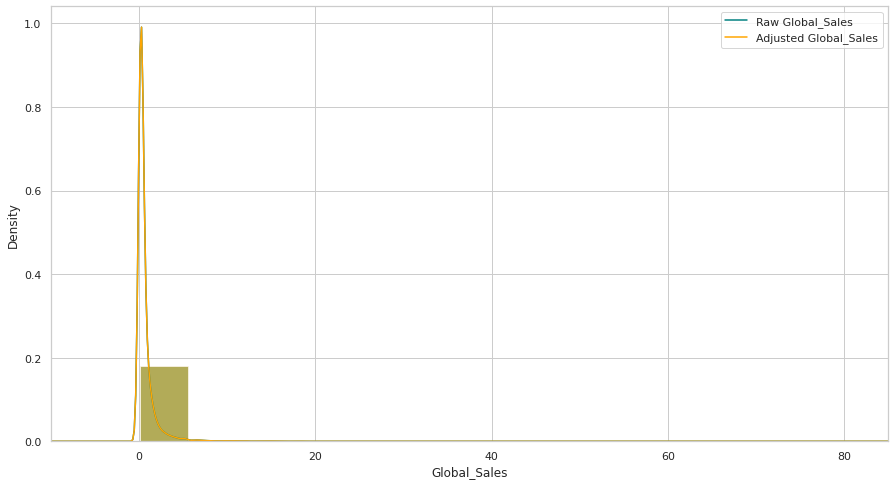

In [63]:
plt.figure(figsize=(15,8))
ax = df["Global_Sales"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Global_Sales"].plot(kind='density', color='teal')
ax = train_data["Global_Sales"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Global_Sales"].plot(kind='density', color='orange')
ax.legend(['Raw Global_Sales', 'Adjusted Global_Sales'])
ax.set(xlabel='Global_Sales')
plt.xlim(-10,85)
plt.show()

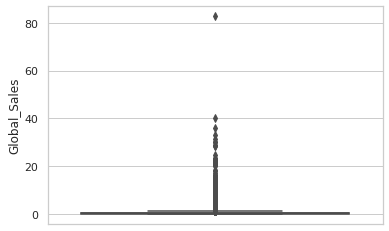

In [64]:
ax= sns.boxplot(y="Global_Sales", data=train_data)